In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

In [2]:
# Connect to MySQL Database
mydb = mysql.connector.connect(
    host='127.0.0.1',
    port='3306',
    user='root',
    password='Ramya@123',
    database='tracking_expenses',
    auth_plugin='mysql_native_password'
)

In [3]:
def execute_query(query):
    cursor = mydb.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [i[0] for i in cursor.description]  # Get column names
    cursor.close()
    return pd.DataFrame(result, columns=columns)

         Category Total_Spent
0   Entertainment    65125.33
1        Personal    65061.60
2      Investment    64356.33
3  Transportation    64275.07
4       Groceries    62544.09
5           Bills    58993.38
6            Food    58746.73
7          Travel    57020.11
8   Subscriptions    54591.12
9           Gifts    52711.72


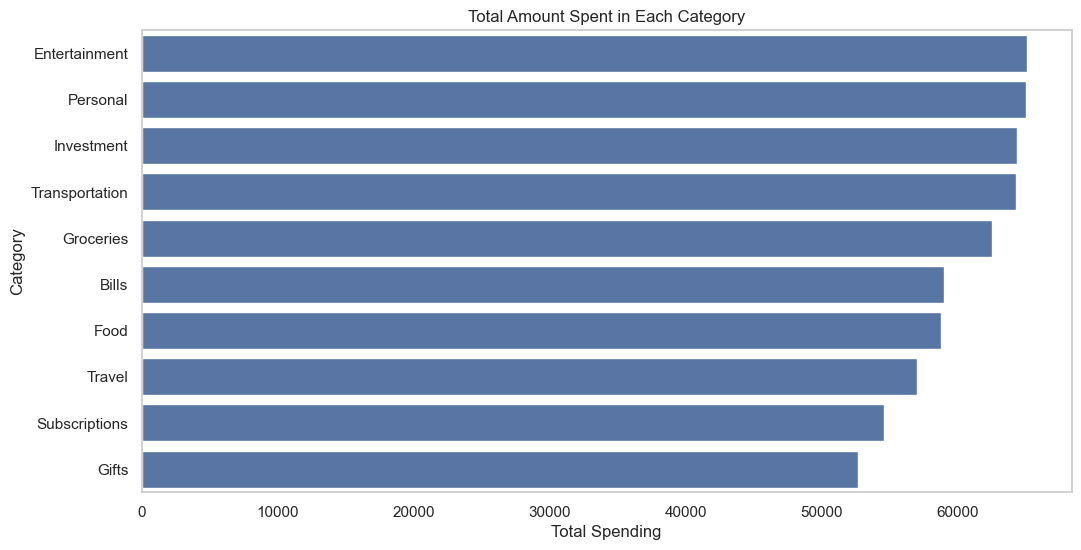

In [4]:
# 1. Query to get total amount spent in each category
query = """
SELECT Category, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY Category
ORDER BY Total_Spent DESC;
"""

# Load the results into a DataFrame
total_spent_by_category = execute_query(query)
print(total_spent_by_category)

# a bar chart to visualize total spending by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Spent', y='Category', data=total_spent_by_category)
plt.title('Total Amount Spent in Each Category')
plt.xlabel('Total Spending')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

  Payment_Mode Total_Spent
0          UPI   127961.87
1   Debit Card   125468.58
2         Cash   125181.71
3  Credit Card   118734.36
4  Net Banking   106078.96


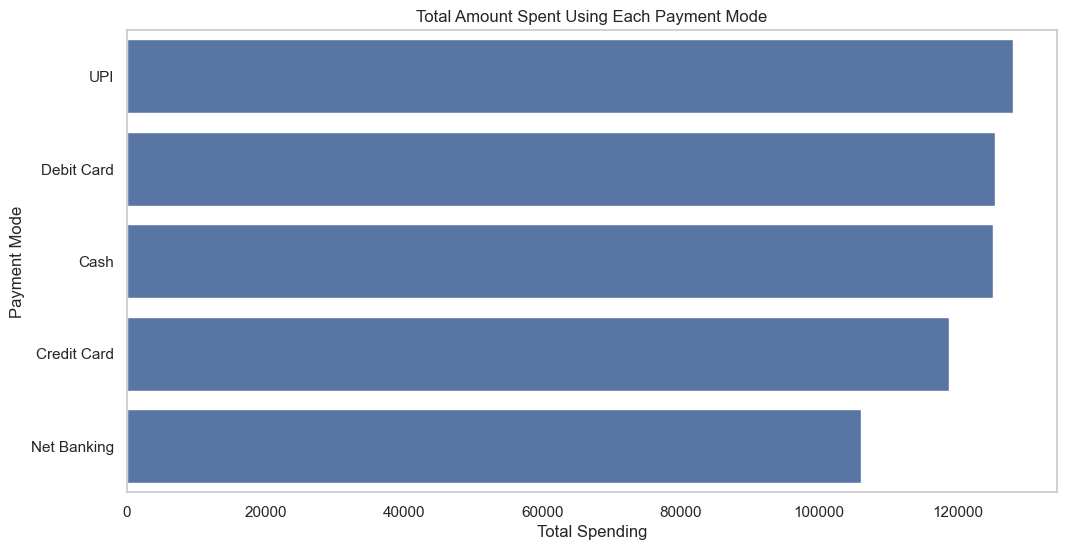

In [5]:
# 2. Query to get total amount spent using each payment mode
query = """
SELECT Payment_Mode, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY Payment_Mode
ORDER BY Total_Spent DESC;
"""

# Load the results into a DataFrame
total_spent_by_payment_mode = execute_query(query)
print(total_spent_by_payment_mode)

#  a bar chart to visualize total spending by payment mode
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Spent', y='Payment_Mode', data=total_spent_by_payment_mode)
plt.title('Total Amount Spent Using Each Payment Mode')
plt.xlabel('Total Spending')
plt.ylabel('Payment Mode')
plt.grid(axis='x')
plt.show()

  Total_Cashback
0       26328.88


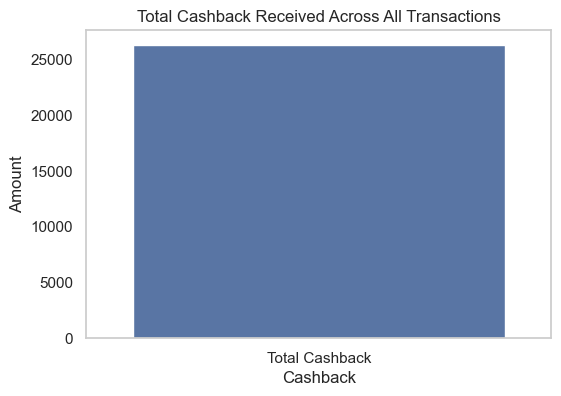

In [6]:
# 3. Query to get total cashback received across all transactions
query = """
SELECT SUM(Cashback) AS Total_Cashback
FROM all_expenses;
"""

# Load the results into a DataFrame
total_cashback = execute_query(query)
print(total_cashback)

# Create a bar chart to visualize total cashback
plt.figure(figsize=(6, 4))
sns.barplot(x=['Total Cashback'], y=total_cashback['Total_Cashback'])
plt.title('Total Cashback Received Across All Transactions')
plt.xlabel('Cashback')
plt.ylabel('Amount')
plt.grid(axis='y')
plt.show()

         Category Total_Spent
0   Entertainment    65125.33
1        Personal    65061.60
2      Investment    64356.33
3  Transportation    64275.07
4       Groceries    62544.09


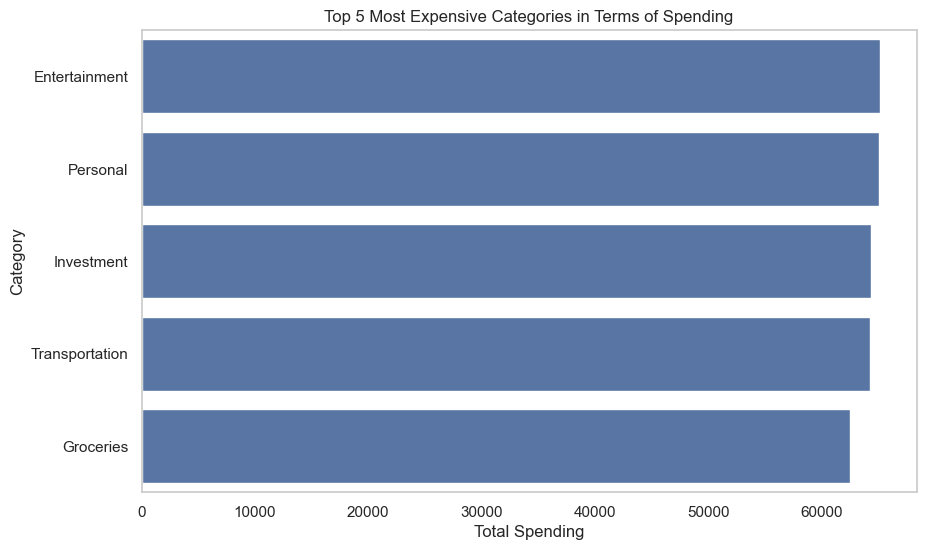

In [7]:
# 4. SQL Query for Top 5 Most Expensive Categories
query = """
SELECT Category, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY Category
ORDER BY Total_Spent DESC
LIMIT 5;
"""

# Load the results into a DataFrame
top_5_expensive_categories = execute_query(query)

print(top_5_expensive_categories)

# Create a horizontal bar chart to visualize the top 5 most expensive categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Spent', y='Category', data=top_5_expensive_categories )
plt.title('Top 5 Most Expensive Categories in Terms of Spending')
plt.xlabel('Total Spending')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()


  Payment_Mode Total_Spent
0  Net Banking    14027.14
1          UPI    13937.63
2         Cash    13752.16
3   Debit Card    12117.81
4  Credit Card    10440.33


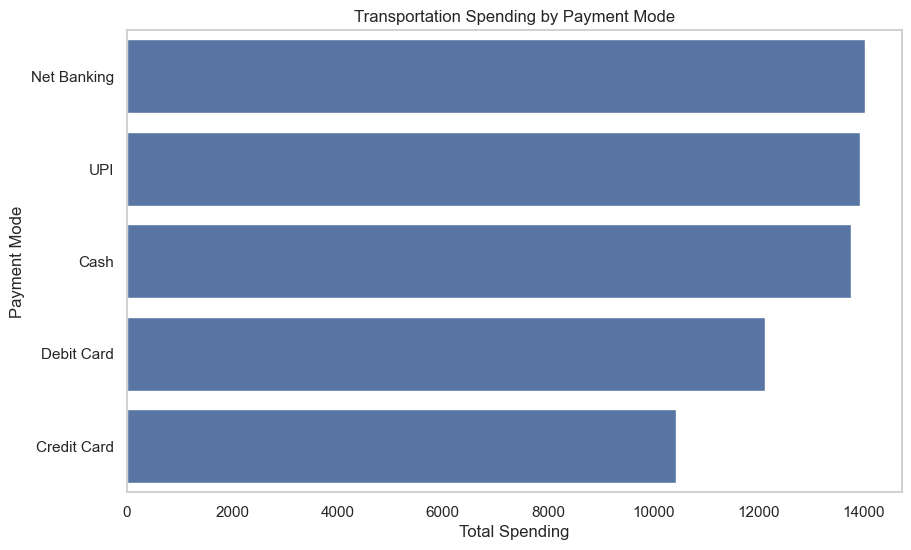

In [8]:
# 5. Query to get how much was spent on transportation using different payment modes
query = """
SELECT Payment_Mode, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
WHERE Category = 'Transportation'
GROUP BY Payment_Mode
ORDER BY Total_Spent DESC;
"""

# Load the results into a DataFrame
transportation_spending = execute_query(query)
print(transportation_spending)

# Create a bar chart to visualize transportation spending by payment mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Spent', y='Payment_Mode', data=transportation_spending)
plt.title('Transportation Spending by Payment Mode')
plt.xlabel('Total Spending')
plt.ylabel('Payment Mode')
plt.grid(axis='x')
plt.show()

        id        Date        Category Payment_Mode  \
0        1  2024-01-26          Travel   Debit Card   
1        2  2024-01-16           Gifts         Cash   
2        3  2024-01-24  Transportation  Credit Card   
3        4  2024-01-03   Entertainment         Cash   
4        5  2024-01-27   Subscriptions  Net Banking   
...    ...         ...             ...          ...   
1073  1196  2024-09-23   Entertainment  Credit Card   
1074  1197  2024-09-11        Personal   Debit Card   
1075  1198  2024-09-14           Bills         Cash   
1076  1199  2024-09-27   Entertainment         Cash   
1077  1200  2024-09-13  Transportation   Debit Card   

                          Description Amount_Paid Cashback  
0     Flight tickets to a destination      765.73    56.31  
1                    Charity donation       64.72     3.48  
2              Taxi fare to a meeting      748.46    21.04  
3             Dining out with friends      766.20    57.20  
4                      Gym members

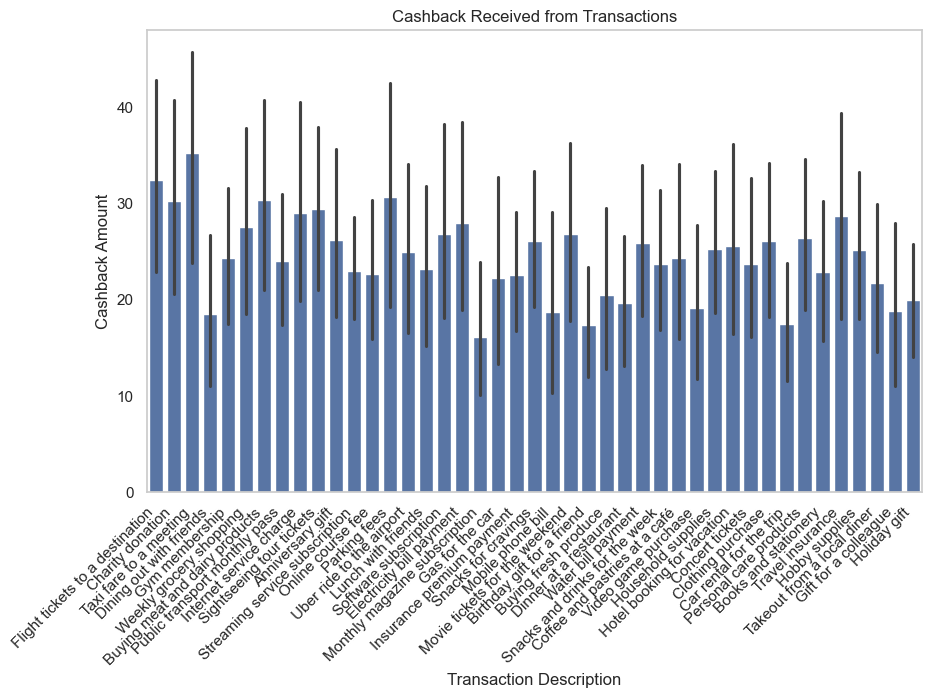

In [9]:
# 6. Query to get transactions that resulted in cashback
query = """
SELECT *
FROM all_expenses
WHERE Cashback > 0;
"""

# Load the results into a DataFrame
cashback_transactions = execute_query(query)

print(cashback_transactions)

# Create a bar chart to visualize total cashback from these transactions
plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='Cashback', data=cashback_transactions)
plt.title('Cashback Received from Transactions')
plt.xlabel('Transaction Description')
plt.ylabel('Cashback Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis='y')
plt.show()

    Month Total_Spent
0       1    54393.02
1       2    51028.12
2       3    49152.15
3       4    47982.28
4       5    50208.32
5       6    51953.42
6       7    51797.72
7       8    49737.82
8       9    46788.43
9      10    50348.23
10     11    52369.72
11     12    47666.25


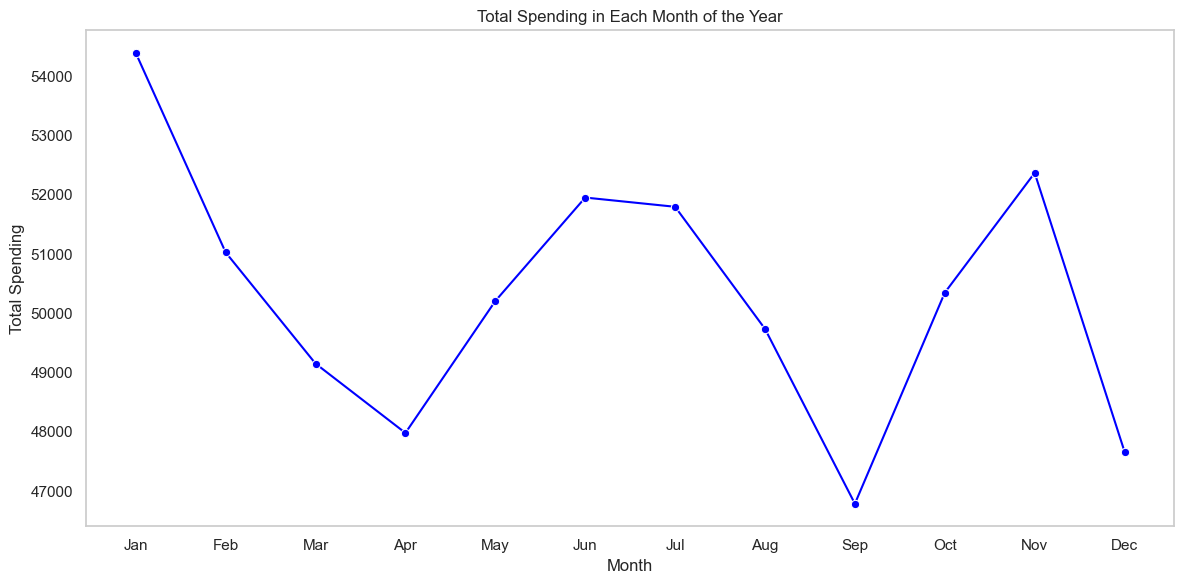

In [10]:
#7.  Query to get total spending in each month of the year
query = """
SELECT MONTH(Date) AS Month, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY MONTH(Date)
ORDER BY Month;
"""

# Load the results into a DataFrame
monthly_spending = execute_query(query)
print(monthly_spending)

# Create a line chart to visualize total spending by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Spent', data=monthly_spending, marker='o', color='blue')
plt.title('Total Spending in Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

     Month        Category Total_Spent
0        1   Subscriptions     8569.85
10       2  Transportation    10499.08
20       3      Investment     7972.01
30       4       Groceries     8966.94
40       5           Gifts     7816.96
50       6      Investment     7684.42
60       7       Groceries     8050.52
70       8           Bills     7593.98
80       9      Investment     7160.67
90      10       Groceries     8476.74
100     11   Entertainment     8123.90
110     12           Bills     7123.50


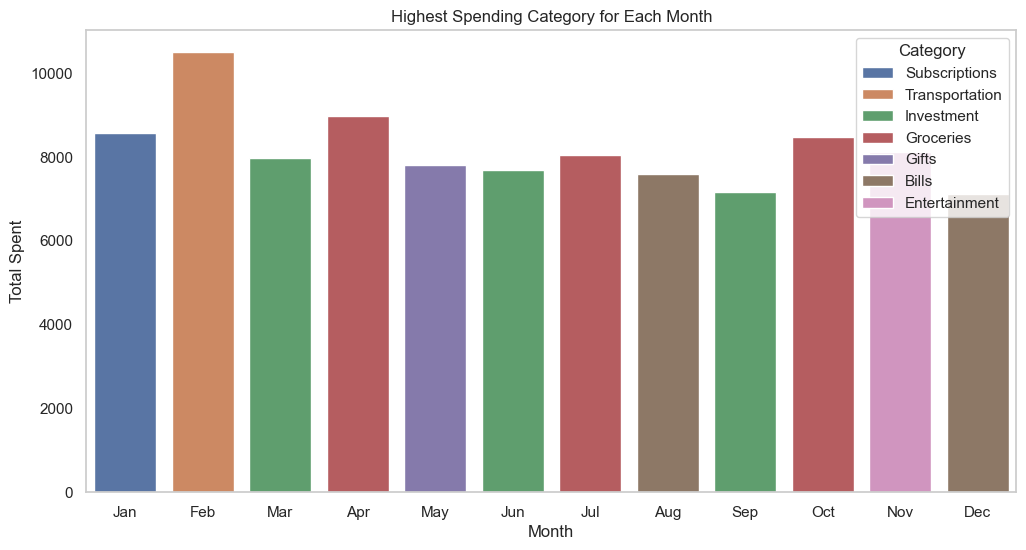

In [11]:
# 8th query to get months with highest spending in specific categories
query = """
SELECT MONTH(Date) AS Month, Category, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY MONTH(Date), Category
ORDER BY Month, Total_Spent DESC;
"""

# Load the results into a DataFrame and get the highest spending category for each month
highest_spending = execute_query(query).loc[lambda df: df.groupby('Month')['Total_Spent'].idxmax()]
print(highest_spending)

# Create a bar chart to visualize the highest spending category for each month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total_Spent', hue='Category', data=highest_spending)
plt.title('Highest Spending Category for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Category')
plt.grid(axis='y')
plt.show()

Recurring Expenses DataFrame:
    Month   Expense_Type Total_Expense
0       1          Bills       5374.76
1       1  Subscriptions       8569.85
2       2          Bills       5364.25
3       2  Subscriptions       4972.76
4       3          Bills       5186.83
5       3  Subscriptions       2734.16
6       4          Bills       3192.54
7       4  Subscriptions       5358.99
8       5          Bills       3593.14
9       5  Subscriptions       4722.55
10      6          Bills       5319.31
11      6  Subscriptions       3835.02
12      7          Bills       4646.86
13      7  Subscriptions       4457.98
14      8          Bills       7593.98
15      8  Subscriptions       2863.03
16      9          Bills       4811.70
17      9  Subscriptions       2294.77
18     10          Bills       3235.61
19     10  Subscriptions       2564.10
20     11          Bills       3550.90
21     11  Subscriptions       7965.96
22     12          Bills       7123.50
23     12  Subscriptions       425

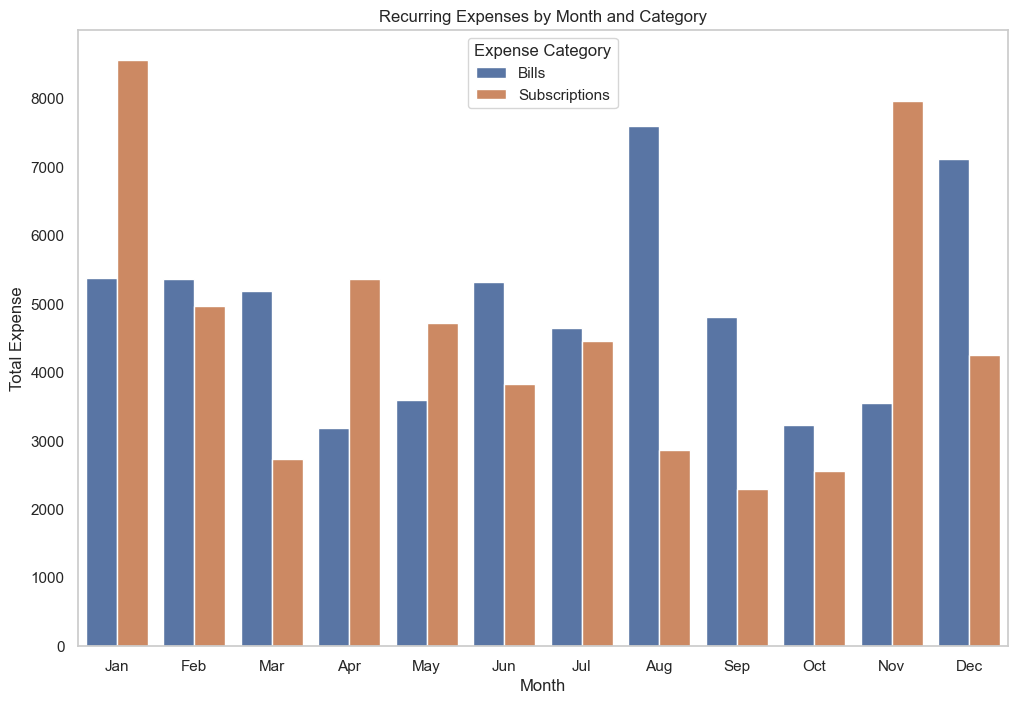

In [12]:
# 9. Query to get recurring expenses by month
query = """
SELECT MONTH(Date) AS Month, Category AS Expense_Type, SUM(Amount_Paid) AS Total_Expense
FROM all_expenses
WHERE Category IN ('Insuranc', 'Bills', 'Subscriptions')
GROUP BY MONTH(Date), Category
ORDER BY Month, Category;
"""

# Load the results into a DataFrame
recurring_expenses = execute_query(query)

# Print the result for debugging
print("Recurring Expenses DataFrame:")
print(recurring_expenses)

# Create a pivot table for better visualization
pivot_table = recurring_expenses.pivot(index='Month', columns='Expense_Type', values='Total_Expense').fillna(0)

plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total_Expense', hue='Expense_Type', data=recurring_expenses)
plt.title('Recurring Expenses by Month and Category')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Expense Category')
plt.grid(axis='y')
plt.show()

    Month Total_Cashback
0       1        2444.45
1      10        2087.54
2      11        2081.30
3      12        2258.12
4       2        2073.35
5       3        1925.05
6       4        2314.46
7       5        2262.52
8       6        2433.93
9       7        2232.57
10      8        2353.88
11      9        1861.71


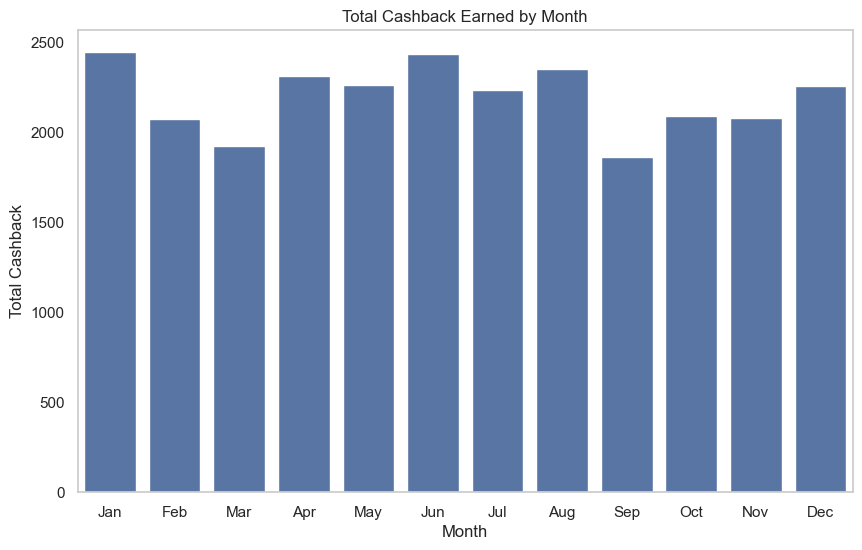

In [13]:
# 10. Query to calculate total cashback earned by month
query = """
SELECT MONTH(Date) AS Month, SUM(Cashback) AS Total_Cashback
FROM all_expenses
GROUP BY MONTH(Date);
"""

# Load the results into a DataFrame
cashback_data = execute_query(query)
print(cashback_data )

# Create a bar chart to visualize total cashback earned by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total_Cashback', data=cashback_data)
plt.title('Total Cashback Earned by Month')
plt.xlabel('Month')
plt.ylabel('Total Cashback')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

      Month Total_Spending
0   2024-01       54393.02
1   2024-02       51028.12
2   2024-03       49152.15
3   2024-04       47982.28
4   2024-05       50208.32
5   2024-06       51953.42
6   2024-07       51797.72
7   2024-08       49737.82
8   2024-09       46788.43
9   2024-10       50348.23
10  2024-11       52369.72
11  2024-12       47666.25


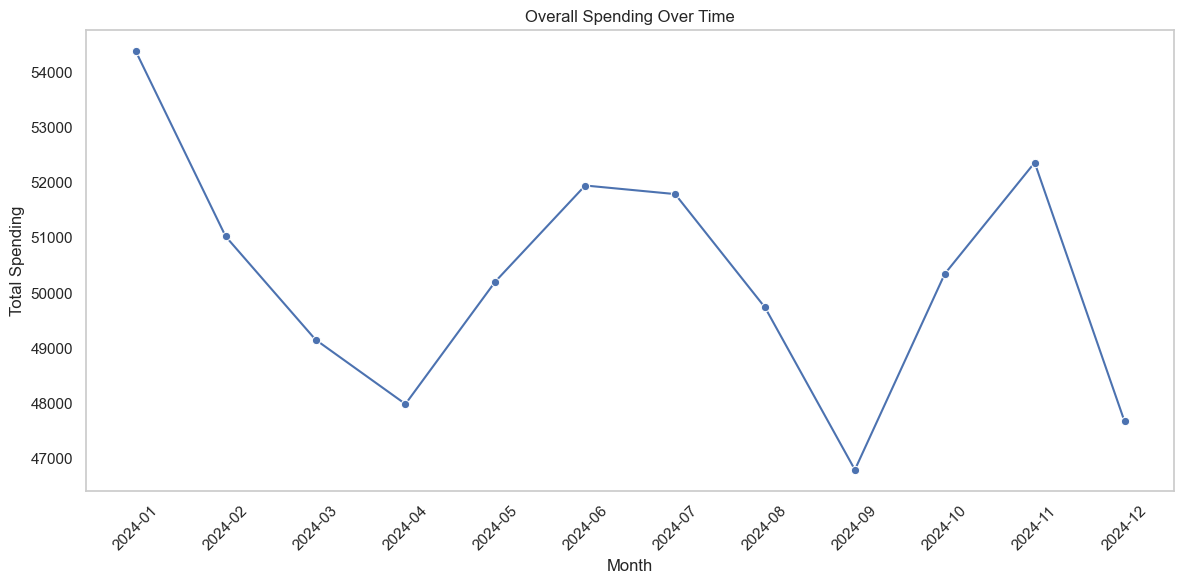

In [14]:
# 11. Query to get total spending by month
query = """
SELECT DATE_FORMAT(Date, '%Y-%m') AS Month, SUM(Amount_Paid) AS Total_Spending
FROM all_expenses
GROUP BY Month
ORDER BY Month;
"""

# Load the results into a DataFrame
spending_data = execute_query(query)
print(spending_data)

# Create a line chart to visualize overall spending over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Spending', data=spending_data, marker='o')
plt.title('Overall Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

                       Description Average_Cost
0  Flight tickets to a destination   608.872857
1         Sightseeing tour tickets   555.160000
2       Hotel booking for vacation   534.954783
3          Car rental for the trip   391.414167
4                 Travel insurance   480.937778


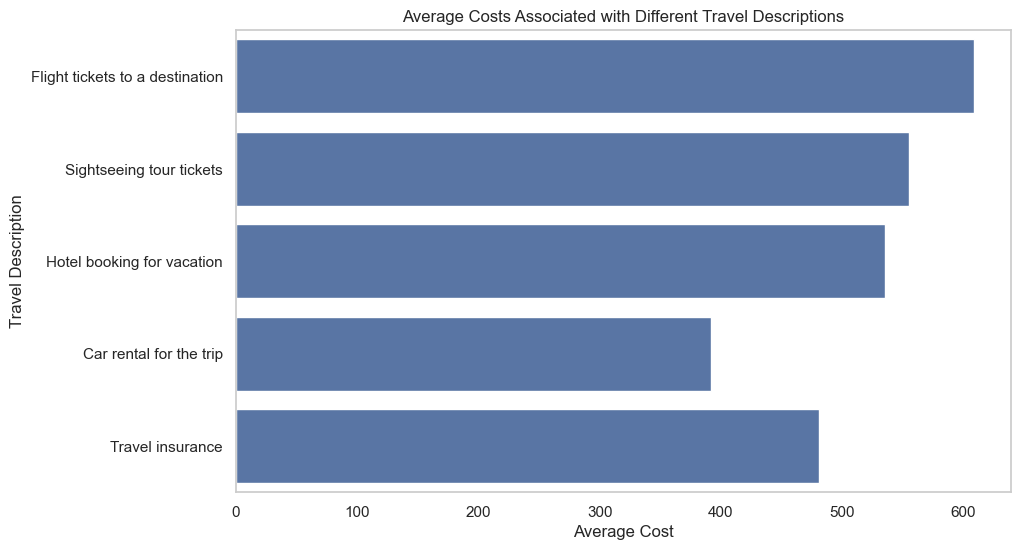

In [15]:
#12.  Query to get average costs associated with different travel descriptions
query = """
SELECT Description, AVG(Amount_Paid) AS Average_Cost
FROM all_expenses
WHERE Category = 'Travel'
GROUP BY Description;
"""
# Load the results into a DataFrame
average_travel_costs = execute_query(query)
print(average_travel_costs)

# Create a bar chart to visualize average costs associated with different travel descriptions
plt.figure(figsize=(10, 6))
sns.barplot(x='Average_Cost', y='Description', data=average_travel_costs)
plt.title('Average Costs Associated with Different Travel Descriptions')
plt.xlabel('Average Cost')
plt.ylabel('Travel Description')
plt.grid(axis='x')
plt.show()

   Day_of_Week Total_Spent
0            1     7542.66
1            2    13442.98
2            3     9356.63
3            4     9104.66
4            5     4994.14
5            6     8168.43
6            7     9934.59


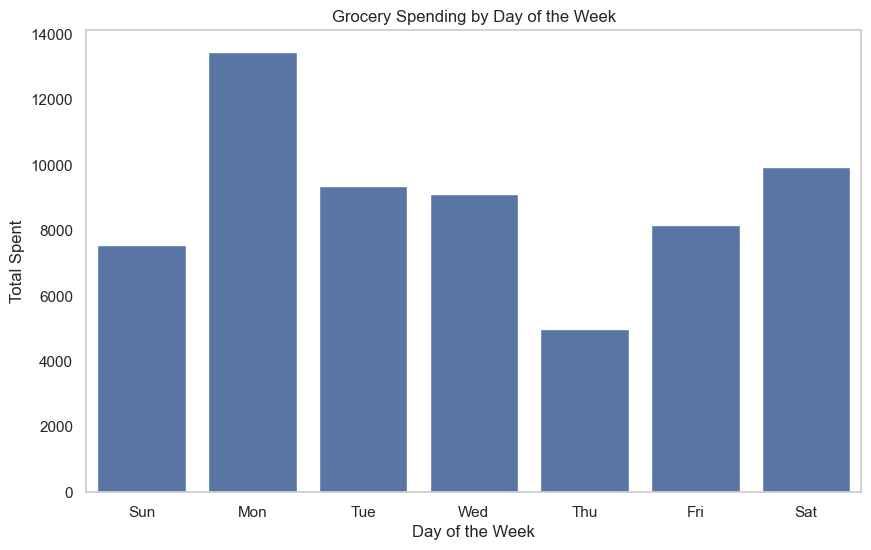

In [16]:
# 13 .Query to analyze grocery spending by day of the week
query = """
SELECT DAYOFWEEK(Date) AS Day_of_Week, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
WHERE Category = 'Groceries'
GROUP BY Day_of_Week
ORDER BY Day_of_Week;
"""

# Load the results into a DataFrame
grocery_spending_analysis = execute_query(query)
print(grocery_spending_analysis)

# Create a bar chart to visualize grocery spending by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Total_Spent', data=grocery_spending_analysis)
plt.title('Grocery Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Spent')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y')
plt.show()

        Priority Total_Spent
0  High Priority   121537.47
1   Low Priority   299839.62
2          Other   182048.39


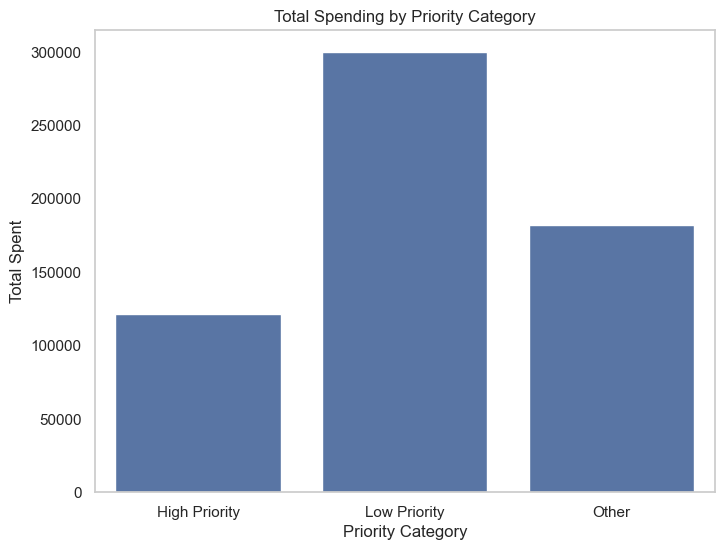

In [17]:
# 14. Query to categorize expenses into high and low priority
query = """
SELECT 
    CASE 
        WHEN Category IN ( 'Bills', 'Groceries', 'Insurance' ) THEN 'High Priority'
        WHEN Category IN ('Entertainment', 'Travel', 'Subscriptions','Investment','Food') THEN 'Low Priority'
        ELSE 'Other'
    END AS Priority,
    SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY Priority
ORDER BY Priority;
"""

# Load the results into a DataFrame
priority_expenses = execute_query(query)
print(priority_expenses)

# Create a bar chart to visualize spending by priority category
plt.figure(figsize=(8, 6))
sns.barplot(x='Priority', y='Total_Spent', data=priority_expenses)
plt.title('Total Spending by Priority Category')
plt.xlabel('Priority Category')
plt.ylabel('Total Spent')
plt.grid(axis='y')
plt.show()

Category with the highest contribution: Entertainment - 10.79%


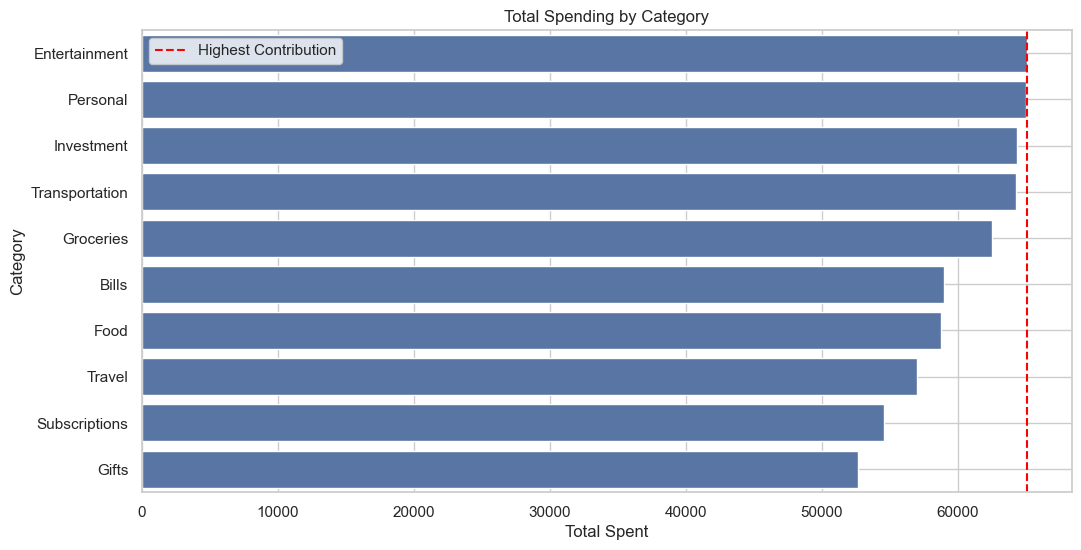

In [18]:

# 15. Query to calculate total spending by category
query = """
SELECT Category, 
       SUM(Amount_Paid) AS Total_Spent,
       (SUM(Amount_Paid) / (SELECT SUM(Amount_Paid) FROM all_expenses) * 100) AS Percentage_Of_Total
FROM all_expenses
GROUP BY Category
ORDER BY Total_Spent DESC
"""

# Load the results into a DataFrame
category_spending = execute_query(query)

# Calculate the total spending
total_spending = category_spending['Total_Spent'].sum()

# Calculate the percentage contribution of each category
category_spending['Percentage'] = (category_spending['Total_Spent'] / total_spending) * 100

# Find the category with the highest percentage contribution
highest_contribution = category_spending.loc[category_spending['Percentage'].idxmax()]

print(f"Category with the highest contribution: {highest_contribution['Category']} - {highest_contribution['Percentage']:.2f}%")

# Create a bar chart to visualize spending by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Spent', y='Category', data=category_spending)
plt.title('Total Spending by Category')
plt.xlabel('Total Spent')
plt.ylabel('Category')
plt.axvline(x=highest_contribution['Total_Spent'], color='red', linestyle='--', label='Highest Contribution')
plt.legend()
plt.grid(axis='y')
plt.show()

    Month Total_Spent_On_Travel
0       1               6045.66
1       2               3189.68
2       3               2293.90
3       4               4499.34
4       5               6258.61
5       6               4316.45
6       7               3964.55
7       8               5428.13
8       9               3945.04
9      10               6713.50
10     11               5202.74
11     12               5162.51


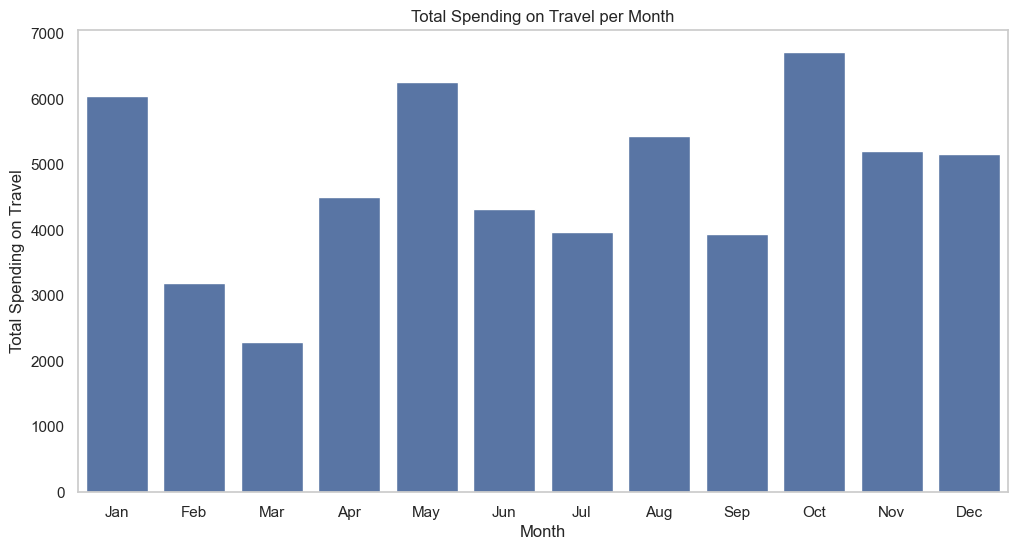

In [19]:
# 16th query to get total spending on travel for each month
query = """
SELECT MONTH(Date) AS Month, SUM(Amount_Paid) AS Total_Spent_On_Travel
FROM all_expenses
WHERE Category = 'Travel'
GROUP BY MONTH(Date)
ORDER BY Month;
"""

# Load the results into a DataFrame
total_spent_on_travel = execute_query(query)
print(total_spent_on_travel)

# Step 3: Create a bar chart to visualize the total spending on travel per month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total_Spent_On_Travel', data=total_spent_on_travel)
plt.title('Total Spending on Travel per Month')
plt.xlabel('Month')
plt.ylabel('Total Spending on Travel')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


         Category Average_Cashback
0          Travel        26.461441
1           Gifts        22.405818
2  Transportation        27.622393
3   Entertainment        22.328516
4   Subscriptions        22.511695
5       Groceries        25.367244
6           Bills        24.888438
7      Investment         0.000000
8            Food        23.097304
9        Personal        25.138871


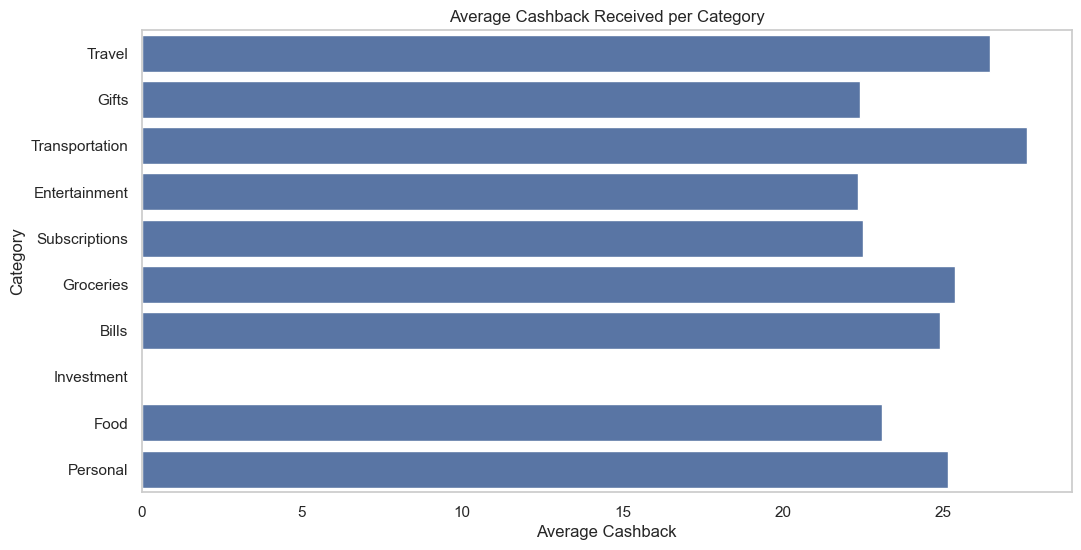

In [20]:
# 17th query to get average cashback received per category
query = """
SELECT Category, AVG(Cashback) AS Average_Cashback
FROM all_expenses
GROUP BY Category;
"""

# Load the results into a DataFrame
average_cashback_per_category = execute_query(query)
print(average_cashback_per_category)

# Step 3: Create a horizontal bar chart to visualize the average cashback per category
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Cashback', y='Category', data=average_cashback_per_category)
plt.title('Average Cashback Received per Category')
plt.xlabel('Average Cashback')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

    Month Total_Spent_On_Bills
0       1              5374.76
1       2              5364.25
2       3              5186.83
3       4              3192.54
4       5              3593.14
5       6              5319.31
6       7              4646.86
7       8              7593.98
8       9              4811.70
9      10              3235.61
10     11              3550.90
11     12              7123.50


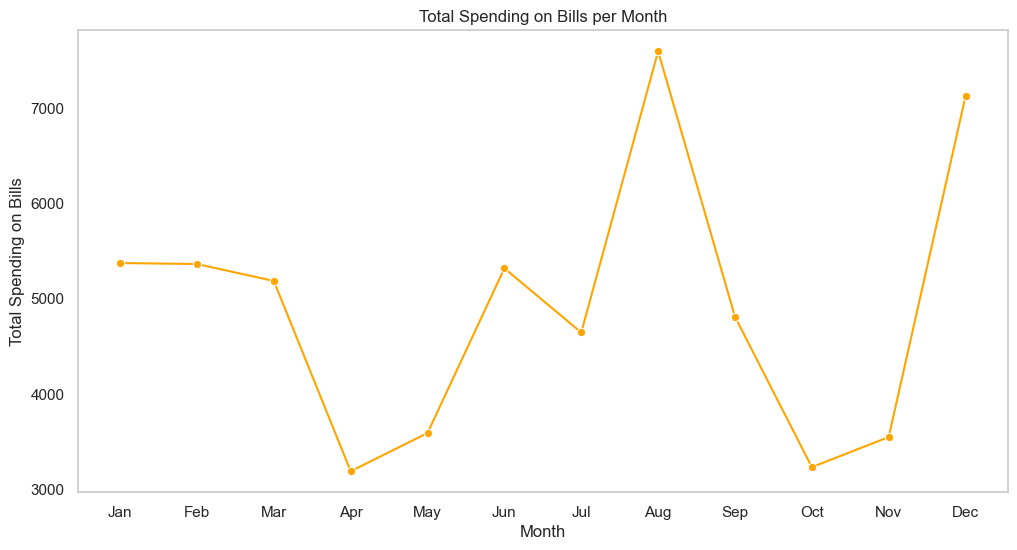

In [21]:
# 18th query to get total spending on bills for each month
query = """
SELECT MONTH(Date) AS Month, SUM(Amount_Paid) AS Total_Spent_On_Bills
FROM all_expenses
WHERE Category = 'Bills'
GROUP BY MONTH(Date)
ORDER BY Month;
"""

# Load the results into a DataFrame
total_spent_on_bills = execute_query(query)
print(total_spent_on_bills)

# Create a line chart to visualize the total spending on bills per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Spent_On_Bills', data=total_spent_on_bills, marker='o', color='orange')
plt.title('Total Spending on Bills per Month')
plt.xlabel('Month')
plt.ylabel('Total Spending on Bills')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

  Payment_Mode  Frequency
0  Credit Card        248
1         Cash        246
2   Debit Card        245


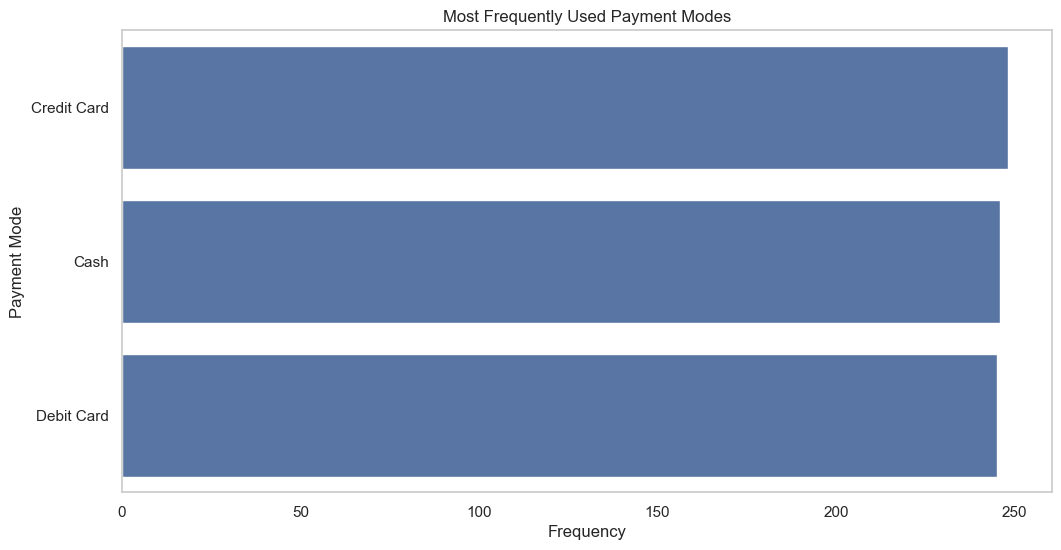

In [22]:
# 19th query to get the most frequently used payment modes
query = """
SELECT Payment_Mode, COUNT(*) AS Frequency
FROM all_expenses
GROUP BY Payment_Mode
ORDER BY Frequency DESC
LIMIT 3;
"""

# Load the results into a DataFrame
most_frequent_payment_modes = execute_query(query)
print(most_frequent_payment_modes)

# Step 3: Create a horizontal bar chart to visualize the most frequently used payment modes
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Payment_Mode', data=most_frequent_payment_modes)
plt.title('Most Frequently Used Payment Modes')
plt.xlabel('Frequency')
plt.ylabel('Payment Mode')
plt.grid(axis='x')
plt.show()

         Category Highest_Transaction_Amount
0          Travel                     983.41
1           Gifts                     975.90
2  Transportation                     996.85
3   Entertainment                     993.50
4   Subscriptions                     994.38
5       Groceries                     993.76
6           Bills                     995.39
7      Investment                     993.08
8            Food                     993.16
9        Personal                     999.06


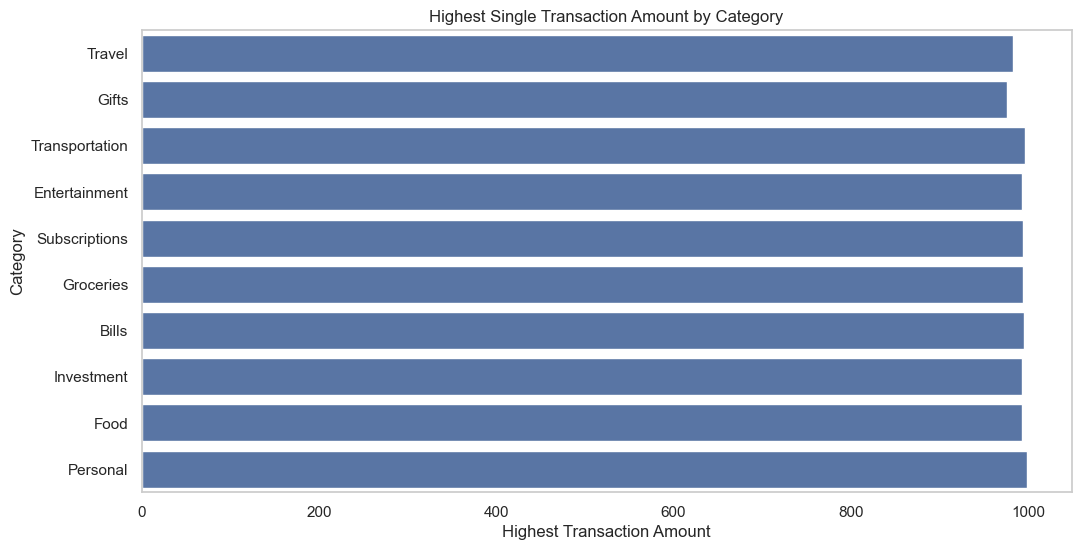

In [23]:
# 20 Query to get the highest single transaction amount by category
query = """
SELECT Category, MAX(Amount_Paid) AS Highest_Transaction_Amount
FROM all_expenses
GROUP BY Category;
"""

# Load results into a DataFrame
highest_transaction_per_category = execute_query(query)
print(highest_transaction_per_category)

# Bar chart visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Highest_Transaction_Amount', y='Category', data=highest_transaction_per_category)
plt.title('Highest Single Transaction Amount by Category')
plt.xlabel('Highest Transaction Amount')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

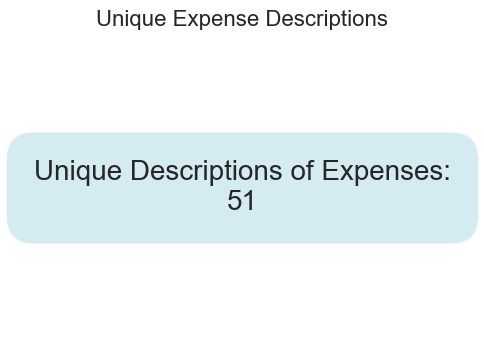

In [24]:
# 21 Query to count unique descriptions of expenses
query = """
SELECT COUNT(DISTINCT Description) AS Unique_Descriptions
FROM all_expenses;
"""
# Load the result into a DataFrame
unique_descriptions = execute_query(query)

# Extract the number of unique descriptions
num_unique_descriptions = unique_descriptions['Unique_Descriptions'][0]

# Create a card-style visualization
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Unique Descriptions of Expenses:\n{num_unique_descriptions}', 
         fontsize=20, ha='center', va='center', bbox=dict(facecolor='lightblue', alpha=0.5, boxstyle='round,pad=1'))
plt.axis('off')  # Turn off the axis
plt.title('Unique Expense Descriptions', fontsize=16)
plt.show()

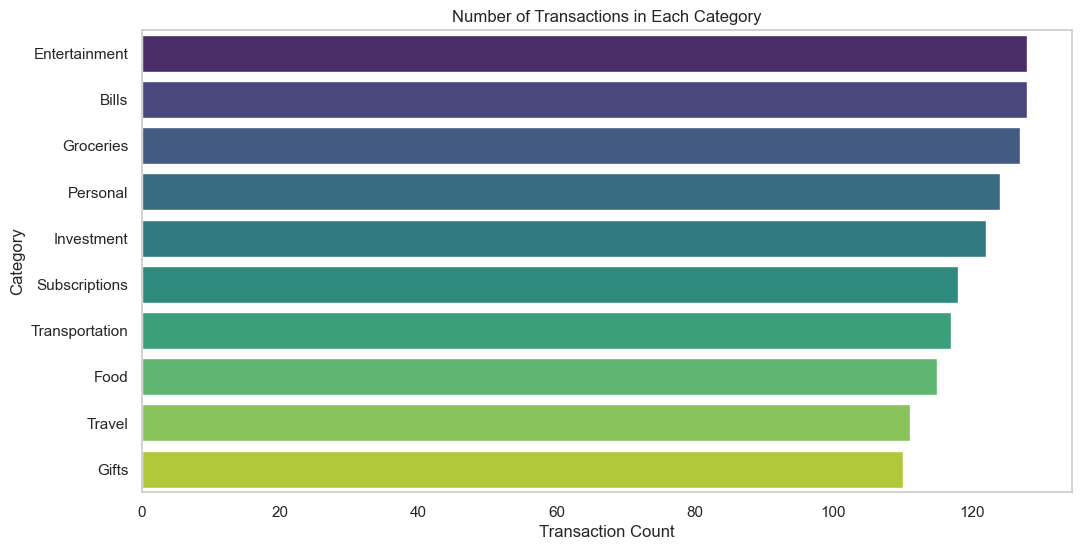

In [25]:
# 22. SQL query to count the number of transactions in each category
query = """
SELECT Category, COUNT(*) AS Transaction_Count
FROM all_expenses
GROUP BY Category
ORDER BY Transaction_Count DESC;
"""

# Load the results into a DataFrame
transaction_counts = execute_query(query)

# Create a bar chart to visualize the number of transactions in each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Transaction_Count', hue='Category', y='Category' ,data=transaction_counts, palette='viridis')
plt.title('Number of Transactions in Each Category')
plt.xlabel('Transaction Count')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

  Category Total_Spent
0    Gifts    52711.72


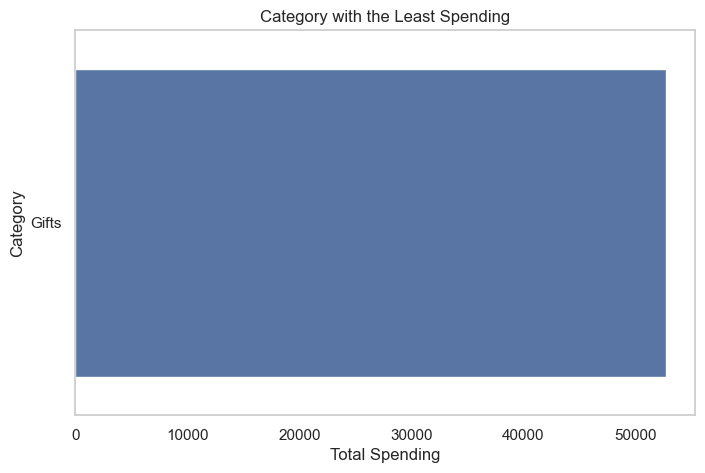

In [26]:

# 23. query to find the category with the least spending
query = """
SELECT Category, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY Category
ORDER BY Total_Spent 
LIMIT 1;
"""

# Load the results into a DataFrame
least_spent_category = execute_query(query)

print(least_spent_category)

# Create a bar chart to visualize the least spent category
plt.figure(figsize=(8, 5))
sns.barplot(x='Total_Spent', y='Category', data=least_spent_category)
plt.title('Category with the Least Spending')
plt.xlabel('Total Spending')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

   Spending_Type Total_Spent
0  Non-Essential   363021.82
1      Essential   240403.66


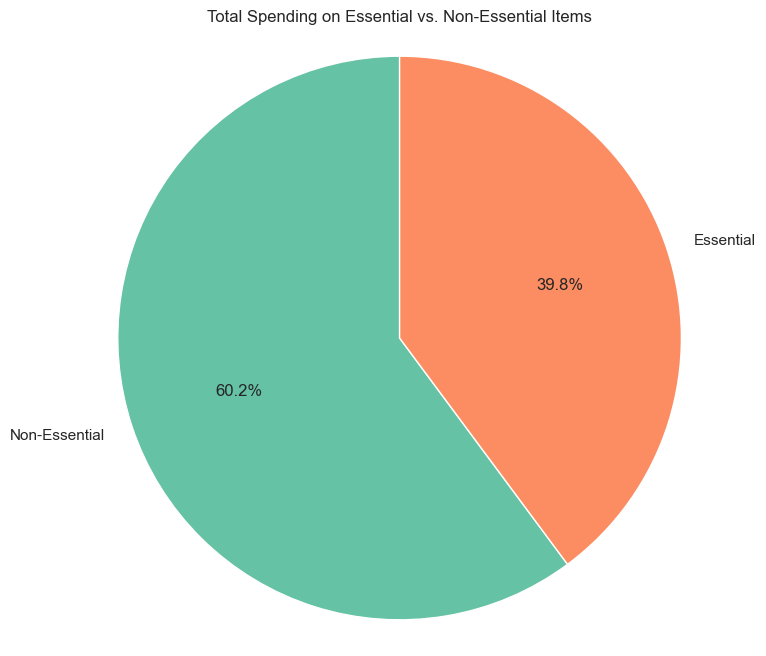

In [27]:
# 24th query to compare spending on essential vs. non-essential items
query = """
SELECT 
    CASE 
        WHEN Category IN ('Groceries', 'Bills', 'Transportation', 'Subscriptions') THEN 'Essential'
        ELSE 'Non-Essential'
    END AS Spending_Type,
    SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
GROUP BY Spending_Type;
"""

# Load the results into a DataFrame
essential_vs_non_essential = execute_query(query)

# Print the result for debugging
print(essential_vs_non_essential)

# Create a pie chart to visualize spending types
plt.figure(figsize=(8, 8))
plt.pie(essential_vs_non_essential['Total_Spent'], 
        labels=essential_vs_non_essential['Spending_Type'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66c2a5', '#fc8d62'])
plt.title('Total Spending on Essential vs. Non-Essential Items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

                     Description Total_Spent
0            Snacks for cravings    15204.28
1         Dinner at a restaurant    13312.59
2     Takeout from a local diner    11823.17
3             Lunch with friends    10627.43
4  Coffee and pastries at a café     7779.26


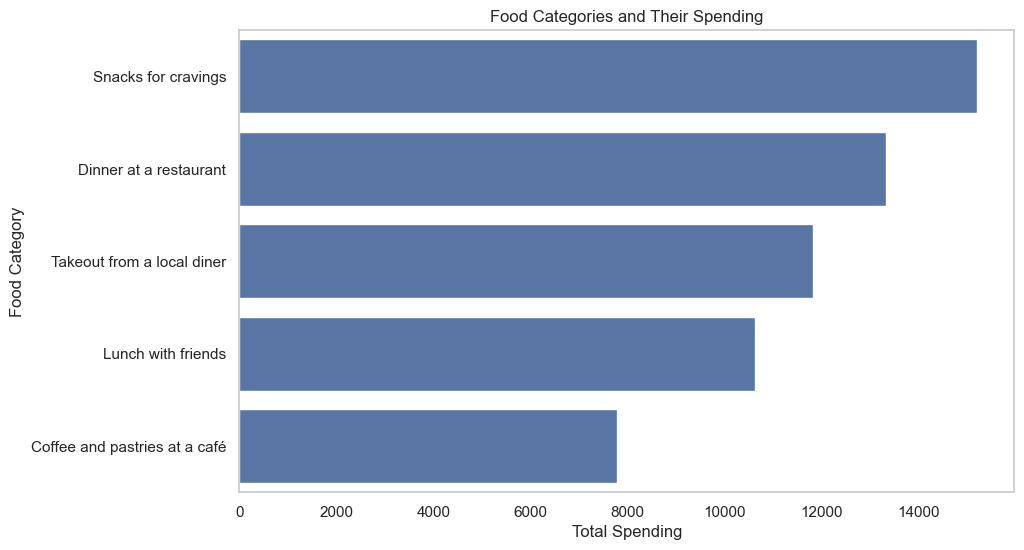

In [28]:
# 25. query to find which food category has the highest spending
query = """
SELECT Description, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
WHERE Category = 'Food'
GROUP BY Description
ORDER BY Total_Spent DESC;
"""

# Load the results into a DataFrame
food_spending = execute_query(query)

# Print the result for debugging
print(food_spending)

# Create a horizontal bar chart to visualize the highest spending food category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Spent', y='Description', data=food_spending)
plt.title('Food Categories and Their Spending')
plt.xlabel('Total Spending')
plt.ylabel('Food Category')
plt.grid(axis='x')
plt.show()

    Month Total_Spent_On_Investments
0       1                    4790.59
1       2                    5196.61
2       3                    7972.01
3       4                    4686.92
4       5                    4566.54
5       6                    7684.42
6       7                    5397.27
7       8                    4025.95
8       9                    7160.67
9      10                    3614.17
10     11                    6497.66
11     12                    2763.52


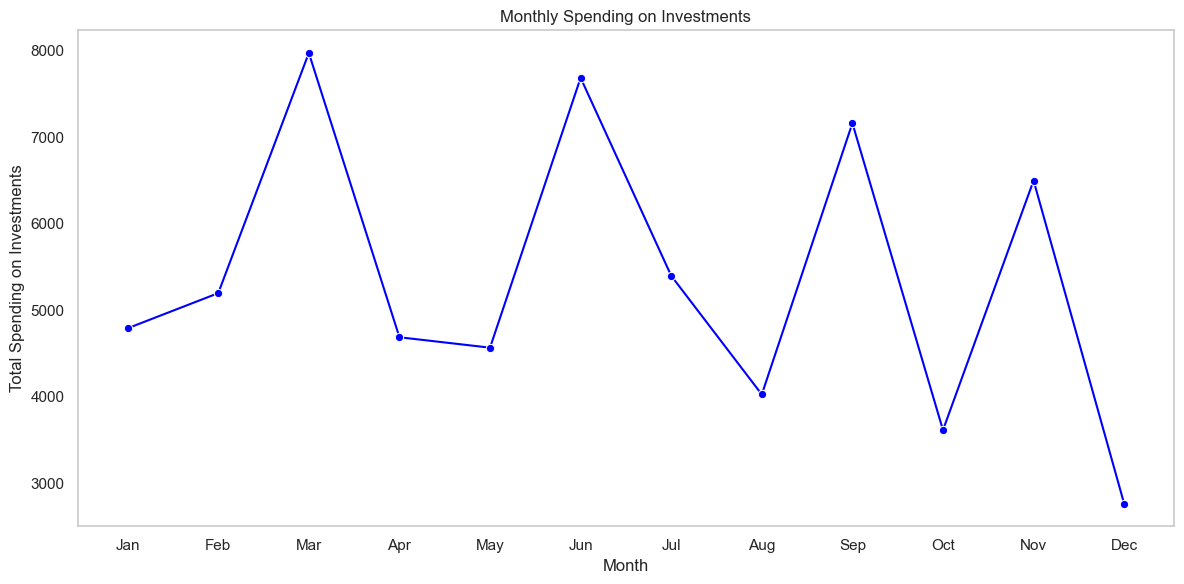

In [29]:
# 26. query to analyze spending on investments by month
query = """
SELECT MONTH(Date) AS Month, SUM(Amount_Paid) AS Total_Spent_On_Investments
FROM all_expenses
WHERE Category = 'Investment'
GROUP BY MONTH(Date)
ORDER BY Month;
"""

# Load the results into a DataFrame
investment_spending = execute_query(query)

print(investment_spending)

# Create a line chart to visualize spending on investments by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Spent_On_Investments', data=investment_spending, marker='o', color='blue')
plt.title('Monthly Spending on Investments')
plt.xlabel('Month')
plt.ylabel('Total Spending on Investments')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

              Description Total_Spent
0       Clothing purchase    17213.65
1    Books and stationery    16887.85
2          Hobby supplies    16005.33
3  Personal care products    14954.77


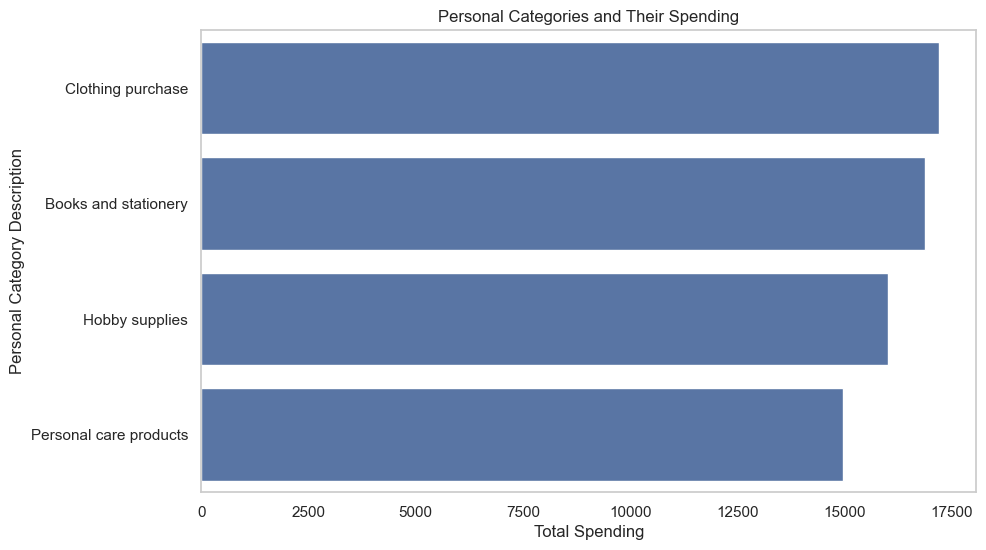

In [30]:
# 27. query to find which personal category description has the highest spending
query = """
SELECT Description, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
WHERE Category = 'Personal'
GROUP BY Description
ORDER BY Total_Spent DESC;
"""

# Load the results into a DataFrame
personal_spending = execute_query(query)

# Print the result for debugging
print(personal_spending)

# Create a horizontal bar chart to visualize the highest spending personal category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Spent', y='Description', data=personal_spending)
plt.title('Personal Categories and Their Spending')
plt.xlabel('Total Spending')
plt.ylabel('Personal Category Description')
plt.grid(axis='x')
plt.show()

                  Description Total_Spent
0            Charity donation    13218.06
1            Anniversary gift    10847.53
2  Birthday gift for a friend    10188.71
3        Gift for a colleague     9238.71
4                Holiday gift     9218.71


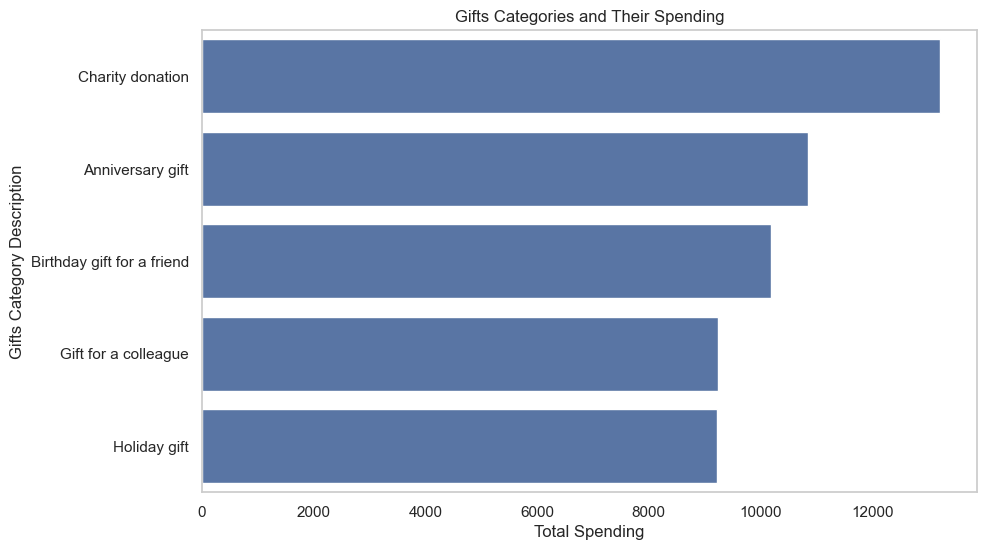

In [31]:
# 28. query to find which gifts category description has the highest spending
query = """
SELECT Description, SUM(Amount_Paid) AS Total_Spent
FROM all_expenses
WHERE Category = 'Gifts'
GROUP BY Description
ORDER BY Total_Spent DESC;
"""

# Load the results into a DataFrame
gifts_spending = execute_query(query)

# Print the result for debugging
print(gifts_spending)

# Create a horizontal bar chart to visualize the spending for each gifts category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Spent', y='Description', data=gifts_spending)
plt.title('Gifts Categories and Their Spending')
plt.xlabel('Total Spending')
plt.ylabel('Gifts Category Description')
plt.grid(axis='x')
plt.show()